# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Exploration

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
import seaborn as sns



# Drop non-numeric columns

In [13]:
numeric_train_data = train_data.drop(["Name", "Ticket", "Cabin"], axis=1)

# Compute correlation matrix

In [15]:
numeric_train_data = train_data.copy()

# Convert 'Sex' column to numeric

In [16]:
numeric_train_data['Sex'] = numeric_train_data['Sex'].map({'male': 0, 'female': 1})


In [17]:
numeric_train_data = numeric_train_data.select_dtypes(include=['float64', 'int64'])


In [18]:
correlation_matrix = numeric_train_data.corr()

# Plot heatmap

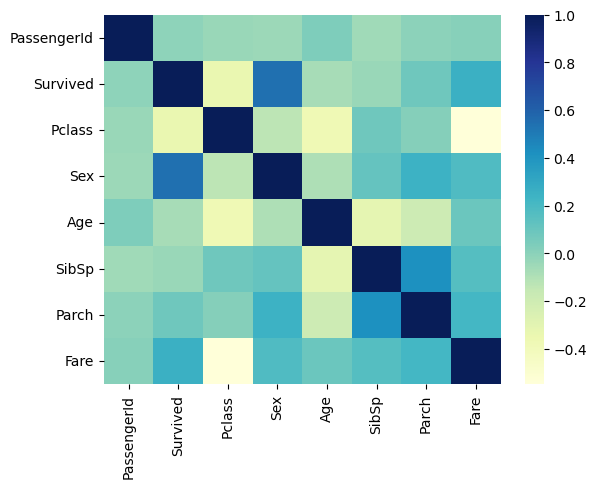

In [19]:
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

# Data Preprocessing

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(train_data, train_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = train_data.loc[train_indices]
    strat_test_set = train_data.loc[test_indices]


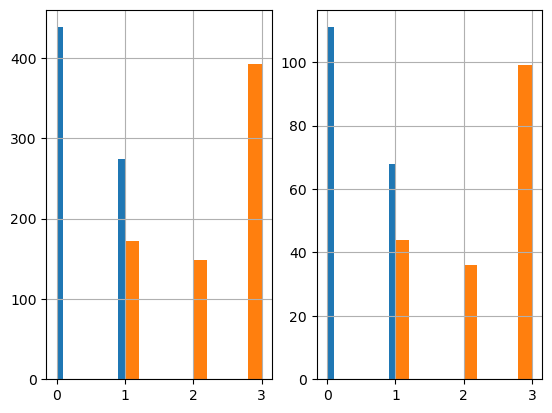

In [86]:
plt.subplot(1, 2, 1)

strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)

strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()


In [87]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 185 to 211
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int32  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     712 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 66.8+ KB


In [88]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


In [89]:

from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Check if 'Embarked' column exists in the DataFrame
        if 'Embarked' in X.columns:
            encoder = OneHotEncoder()
            matrix = encoder.fit_transform(X[['Embarked']]).toarray()
            column_names = ["C", "S", "Q" ,"N"]  
            for i in range(len(matrix.T)):
                X[column_names[i]] = matrix[:, i]

        # Drop the 'Embarked' column regardless of whether it existed or not
        X.drop(columns=['Embarked'], inplace=True, errors='ignore')

        return X




In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")


In [91]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])



In [92]:
strat_train_set = pipeline.fit_transform(strat_train_set)


In [95]:
strat_train_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 185 to 211
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 61.2 KB


In [105]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)   
y = strat_train_set['Survived']

scaler = StandardScaler()  

X_data = scaler.fit_transform(X)  

y_data = y.to_numpy()

In [111]:
X_data

array([[-1.00490638, -1.56828591, -0.36358815, ..., -0.4703927 ,
        -0.308844  ,  0.60547724],
       [-1.05502661,  0.82789342, -2.07417339, ..., -0.4703927 ,
        -0.308844  ,  0.60547724],
       [ 0.93050577,  0.82789342, -0.73545451, ..., -0.4703927 ,
        -0.308844  ,  0.60547724],
       ...,
       [-1.1822549 , -1.56828591, -0.36358815, ...,  2.12588331,
        -0.308844  , -1.65158975],
       [-0.65020933, -0.37019624, -0.36358815, ..., -0.4703927 ,
        -0.308844  ,  0.60547724],
       [-0.90466591, -0.37019624,  0.45451783, ..., -0.4703927 ,
        -0.308844  ,  0.60547724]])

In [109]:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = {
    "n_estimators": [10, 100, 200, 500], 
    "max_depth": [None, 5, 10], 
    "min_samples_split": [2, 3, 4],  # Corrected the closing square bracket and added a comma
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)  # Corrected the equal sign and replaced hyphen with equal sign

grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [110]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = {
    "n_estimators": [10, 100, 200, 500], 
    "max_depth": [None, 5, 10], 
    "min_samples_split": [2, 3, 4],  # Corrected the closing square bracket and added a comma
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)  # Corrected the equal sign and replaced hyphen with equal sign

grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [115]:
final_clf = grid_search.best_estimator_

In [116]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [117]:
strat_test_set = pipeline.transform(strat_test_set) 

In [118]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy() 

In [119]:
final_clf.score(X_data_test, y_data_test)

0.7039106145251397

In [122]:
final_data = pipeline.fit_transform(train_data)

In [123]:
final_data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0.0,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,24.0,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [124]:
X_final = final_data.drop(['Survived'], axis=1)  # Removed the quotes around final_data
y_final = final_data['Survived']  # Added missing equals sign

scaler = StandardScaler()  # Removed extra space after scaler

X_data_final = scaler.fit_transform(X_final)

y_data_final = y_final.to_numpy()

In [125]:
prod_clf = RandomForestClassifier()  # Removed extra space before the equal sign

param_grid = {  # Changed param_gird to param_grid
    "n_estimators": [10, 100, 200, 500], 
    "max_depth": [None, 5, 10], 
    "min_samples_split": [2, 3, 4]  # Fixed the syntax of param_grid
}

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)  # Fixed the syntax of cv and param_grid
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [126]:
prod_final_clf = grid_search.best_estimator_

In [128]:
test_data = pd.read_csv("test.csv")

In [129]:
final_test_data = pipeline.fit_transform(test_data)

In [130]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()  
X_data_final_test = scaler.fit_transform(X_final_test) 

In [131]:
predictions = prod_final_clf.predict(X_data_final_test)

In [132]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [135]:
import os
final_df = pd.DataFrame(test_data['PassengerId'])
final_df['Survived'] = predictions
os.makedirs('data', exist_ok=True)
final_df.to_csv("data/predictions.csv", index=False)


In [136]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
